<a href="https://colab.research.google.com/github/sajeebju/Geophysics-Lab/blob/main/seismic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise - 7

A) Assume a boundary between two beds, which dips at an angle of 5 0 . The seismic
velocity above the interface is 1 km/s and that below it is 2.5 km/s. The perpendicular
distance from the shot to the interface at the end of the profile at which shooting made
downdip is 0.25 km.

Calculate the arrival times for direct wave, reflected wave, and refracted wave if the
recording is conducted at an interval of 0.1 km in the range of 1.5 km from the shot
point.
Plot a few ray-path trajectories and show the timedistance relations for the waves. Find
out the critical distance (Xcrit) and the crossover distance (Xcross) from the diagram.

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt

direct_arr = []
reflection_arr = []
refraction_arr = []

def direct_wave(x_start, x_end, v):
  for i in np.arange(x_start, x_end + 0.1, 0.1):
    t = i / v
    direct_arr.append(round(t, 3))
  return direct_arr
    

def reflection_wave(x_start, x_end, h, theta, v):
  for i in np.arange(x_start, x_end + 0.1, 0.1):
    t = 1/v * (np.sqrt(i**2 + 4*h**2 + 4*h*i*np.sin((np.radians(theta)))))
    reflection_arr.append(round(t, 3))
  return reflection_arr
    

def refraction_wave(x_start, x_end, h,theta, theta_c, v):
  for i in np.arange(x_start, x_end + 0.1, 0.1):
    t = (2*h*np.cos(np.radians(theta_c))) / v + (i*np.sin(np.radians(theta_c + theta)))/v
    refraction_arr.append(round(t, 3))
  return refraction_arr
    

v = 1
v1 = 2.5
theta_c = np.degrees(np.arcsin(v/v1))
x_start = 0
x_end = 1.5
h = 0.25
theta = 5

reflection_time = reflection_wave(x_start, x_end, h, theta, v)
refraction_time = refraction_wave(x_start, x_end, h, theta, theta_c,v)
direct_time = direct_wave(x_start, x_end, v)


In [ ]:
print("Reflection time = ", reflection_time)
print("Refraction time = ", refraction_time)
print("Direct wave time = ", direct_time)


Reflection time =  [0.5, 0.518, 0.554, 0.605, 0.667, 0.737, 0.814, 0.895, 0.98, 1.067, 1.156, 1.247, 1.34, 1.433, 1.527, 1.622]
Refraction time =  [0.458, 0.506, 0.554, 0.602, 0.65, 0.697, 0.745, 0.793, 0.841, 0.889, 0.937, 0.984, 1.032, 1.08, 1.128, 1.176]
Direct wave time =  [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5]


In [ ]:
# #Incomplete code for plotting ray path

# x_range = np.arange(0, 1.5 + 0.1, 0.1)
# plt.figure(figsize = (12, 14))
# plt.plot(x_range, direct_time)
# plt.plot(x_range, reflection_time)
# plt.plot(x_range, refraction_time)

# x1, y1  = (0, 0)
# angle_1 = 265
# length_1 = 0.5

# endy_1 = y1 + length_1 * math.sin(math.radians(angle_1))
# endx_1 = length_1 * math.cos(math.radians(angle_1))
# plt.plot([x1, endx_1], [y1, endy_1])

# x, y = (-0.015, -0.25)
# angle = 355
# length = 1.5

# endy = y + length * math.sin(math.radians(angle))
# endx = length * math.cos(math.radians(angle))
# plt.plot([x, endx], [y, endy])

# a1 = -0.001
# b1 = -0.5

# b2 = -0.04
# for i in np.arange(0.1, 1.5+0.1, 0.1):
#   plt.plot([i, b2], [a1, b1])

# plt.xlabel("Distance-km")
# plt.ylabel("Time-s")
# plt.grid(True)
# plt.xlim(-0.4, 1.6)
# plt.ylim(-0.8, 1.8)
# plt.show()

B) The travel time data for a reflected wave are given in the following table.

In [ ]:
import pandas as pd
import numpy as np

X_meter_pos = np.array([0, 200, 400, 600, 800, 1000])
t_sec_pos = np.array([0.5, 0.53, 0.60, 0.70, 0.83, 0.97])
X_meter_neg = np.array([np.nan, -200, -400, -600, -800, -1000])
t_sec_neg = np.array([np.nan,0.53, 0.60, 0.70, 0.83, 0.97])

df = pd.DataFrame({"X_pos(meter)" : X_meter_pos, "t_p(s)" : t_sec_pos, "X_neg(meter)"  : X_meter_neg, "t_n(s)" :t_sec_neg})
df

,X_pos(meter),t_p(s),X_neg(meter),t_n(s)
0,0,0.50,NaN,NaN
1,200,0.53,-200.0,0.53
2,400,0.60,-400.0,0.60
3,600,0.70,-600.0,0.70
4,800,0.83,-800.0,0.83
5,1000,0.97,-1000.0,0.97


Find out the angle of dip () of the reflecting interface and determine the velocity of the
medium above the interface (v0 ) (assumed to be constant) and the perpendicular
distance (h) from the shot to the interface.

From the velocity value found above, what rock type you would expect to encounter in
a drill hole for the top layer?

In [ ]:
#Data conversion for plotting x^2 and t^2 graph
# X meter to km scale
# x to x^2 


x_square_m = np.power(df["X_pos(meter)"], 2)
x_square_km = x_square_m * 10**(-6)
x_square_km = x_square_km
time_square = np.power(df["t_p(s)"], 2) 

df_b = pd.DataFrame({"x_square_m" : x_square_m, "x_square_km" : x_square_km, "time_square" : time_square})
df_b

,x_square_m,x_square_km,time_square
0,0,0.00,0.2500
1,40000,0.04,0.2809
2,160000,0.16,0.3600
3,360000,0.36,0.4900
4,640000,0.64,0.6889
5,1000000,1.00,0.9409


In [ ]:
def get_slope(y2, y1, x2, x1):
  m = (y2 - y1) / (x2 - x1)
  return m

y1 = df_b.iloc[2]["time_square"]
y2 = df_b.iloc[3]["time_square"]

x1 = df_b.iloc[2]["x_square_km"]
x2 = df_b.iloc[3]["x_square_km"]

slope = get_slope(y2, y1, x2, x1)

# As we know, slope = 1 / v^2

v = np.sqrt(1 / slope)

print("Velocity : {:.2f} km/s".format(v))


Velocity : 1.24 km/s


In [ ]:
# Depth,  h = v * t_0 / 2

t_0 = df.iloc[0, 1]
h = v * t_0 / 2

print("Depth = {:.2f} km".format(h))

Depth = 0.31 km


In [ ]:
#Plotting hyperbolic curve
xs = []
for i in np.arange(-1000, 1200, 200):
  xs.append(i)
 

In [ ]:
t1 = df["t_n(s)"].to_numpy()
t2 = df["t_p(s)"].to_numpy()[::-1]
t1 = t1[np.logical_not(np.isnan(t1))]
t1

array([0.53, 0.6 , 0.7 , 0.83, 0.97])

In [ ]:
t2

array([0.97, 0.83, 0.7 , 0.6 , 0.53, 0.5 ])

In [ ]:
t3 = np.concatenate((t2, t1), axis = 0)
t3

array([0.97, 0.83, 0.7 , 0.6 , 0.53, 0.5 , 0.53, 0.6 , 0.7 , 0.83, 0.97])

In [ ]:
xt = [-1000, -500, 0, 0, 500, 1000]
yt = [0, -0.2, 0, 0, -0.2, 0]

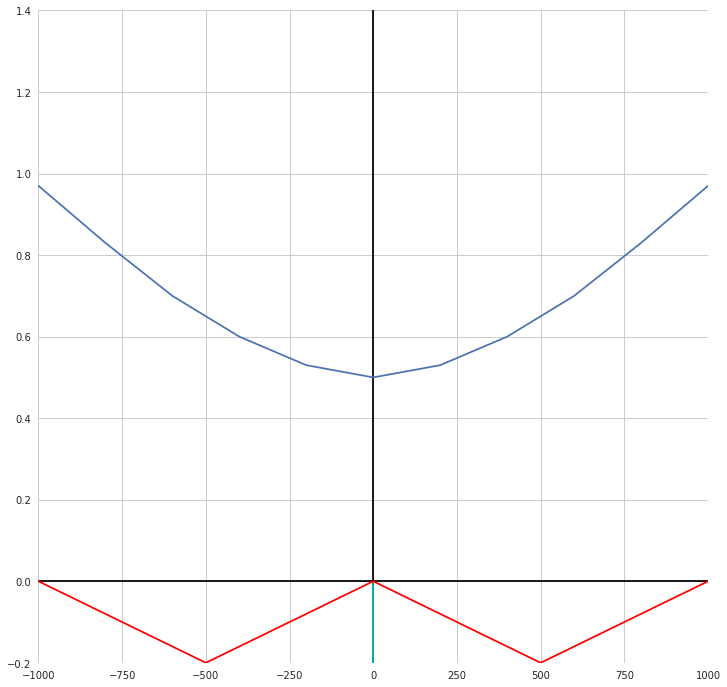

In [ ]:
plt.figure(figsize = (12, 12))
plt.plot(xs, t3)
plt.plot(xt, yt, color = "red")
plt.plot()
plt.vlines(0, -0.2, 1.4, colors = "k")
plt.vlines(0, -0.2, 0, colors = "c")
plt.hlines(0, -1000, 1000, colors = "k")
plt.xlim(-1000, 1000)
plt.ylim(-0.2, 1.4)
plt.grid(True)

# Exercise - 8

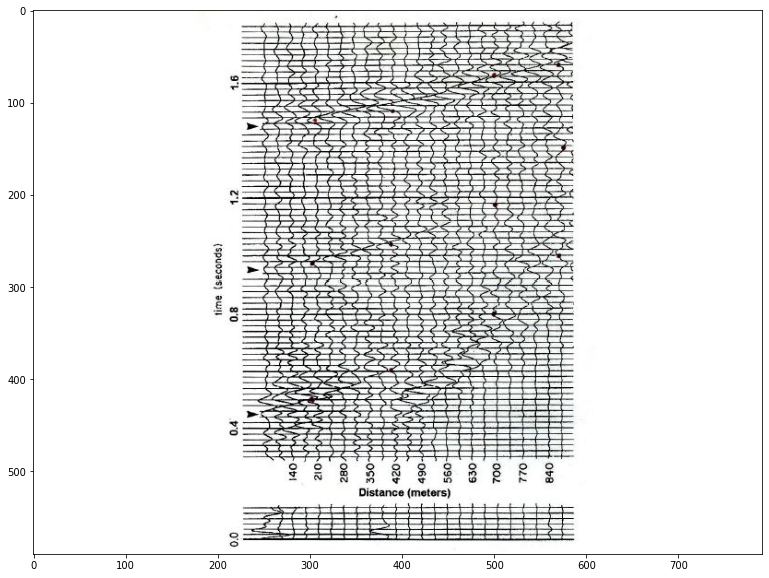

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("/content/drive/MyDrive/Python/traces.JPG")
plt.figure(figsize = (20, 10))
plt.imshow(img)

# Data Frame Create

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot

X_m = np.array([210, 420, 700, 875])
X_km = (X_m/ 1000)
X_sqr_km = X_km**2
t1_s = np.array([0.5, 0.6, 0.8, 1])
t1_s_sqr = (t1_s)**2

t2_s = np.array([0.975, 1.04, 1.175, 1.375])
t2_s_sqr = (t2_s)**2

t3_s = np.array([1.47, 1.53, 1.62, 1.66])
t3_s_sqr = (t3_s)**2

df = pd.DataFrame({"X_m" : X_m, "X_sqr_m" : X_sqr_km,
                   "t1_s" : t1_s, "t1_s_sqr" : t1_s_sqr, "t2_s" : t2_s, "t2_s_sqr" : t2_s_sqr,
                   "t3_s" : t3_s, "t3_s_sqr" : t3_s_sqr})
df

,X_m,X_sqr_m,t1_s,t1_s_sqr,t2_s,t2_s_sqr,t3_s,t3_s_sqr
0,210,0.044100,0.5,0.25,0.975,0.950625,1.47,2.1609
1,420,0.176400,0.6,0.36,1.040,1.081600,1.53,2.3409
2,700,0.490000,0.8,0.64,1.175,1.380625,1.62,2.6244
3,875,0.765625,1.0,1.00,1.375,1.890625,1.66,2.7556


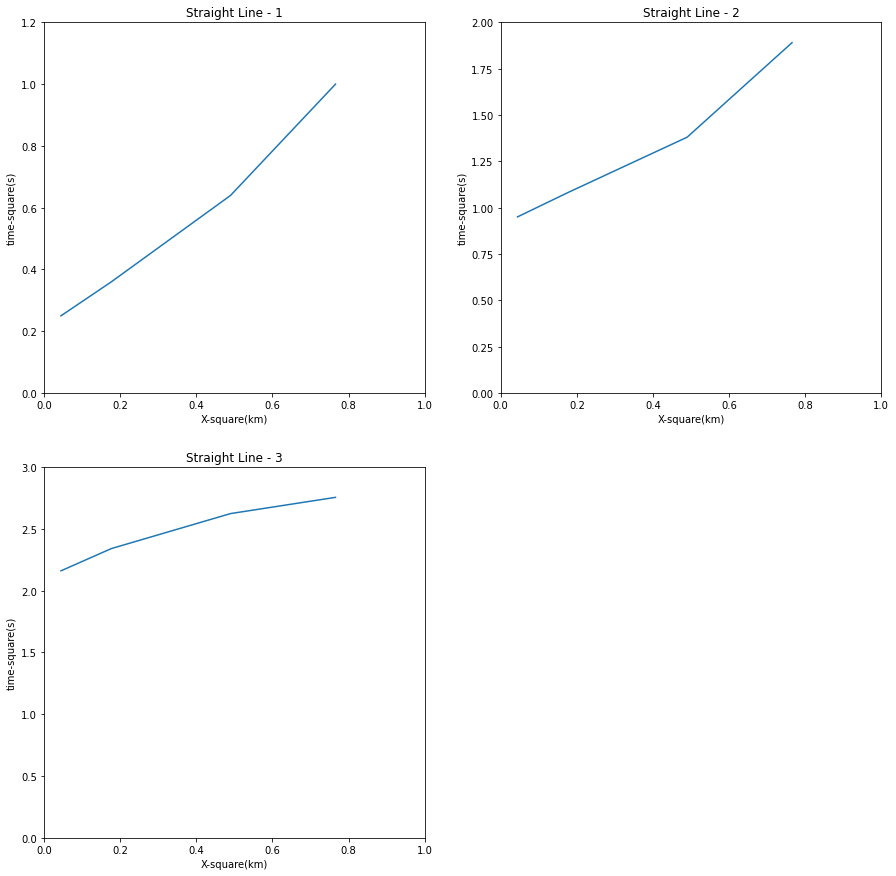

In [ ]:
plt.figure(figsize = (15, 15))
ax1 = plt.subplot(221)
ax1.plot(df["X_sqr_m"], df["t1_s_sqr"])
ax1.set_xlabel("X-square(km)")
ax1.set_ylabel("time-square(s)")
ax1.set_xlim(0, 1.0)
ax1.set_ylim(0, 1.2)
ax1.set_title("Straight Line - 1")

ax2 = plt.subplot(222)
ax2.plot(df["X_sqr_m"], df["t2_s_sqr"])
ax2.set_xlabel("X-square(km)")
ax2.set_ylabel("time-square(s)")
ax2.set_xlim(0, 1.0)
ax2.set_ylim(0, 2.0)
ax2.set_title("Straight Line - 2")

ax3 = plt.subplot(223)
ax3.plot(df["X_sqr_m"], df["t3_s_sqr"])
ax3.set_xlabel("X-square(km)")
ax3.set_ylabel("time-square(s)")
ax3.set_xlim(0, 1.0)
ax3.set_ylim(0, 3)
ax3.set_title("Straight Line - 3")
plt.show()

In [ ]:
t0_1 = 0.45
t0_2 = 0.95
t0_3 = 1.49

# determination of slopes for 3 different straight lines

#for straight line 1
#  slope = 1/v**2  = del(t**2) / del(x**2)

t1_sqr = df.iloc[2]["t1_s_sqr"]
t2_sqr = df.iloc[3]["t1_s_sqr"]

x1_sqr = df.iloc[2]["X_sqr_m"]
x2_sqr = df.iloc[3]["X_sqr_m"]

slope1 = round((t2_sqr - t1_sqr) / (x2_sqr - x1_sqr), 3)

# velocity v1 = sqrt(1/slope1)

v1 = round(np.sqrt(1/slope1), 3)
v1

0.875

In [ ]:
#for straight line 2
#  slope = 1/v**2  = del(t**2) / del(x**2)

t1_sqr_2 = df.iloc[2]["t2_s_sqr"]
t2_sqr_2 = df.iloc[3]["t2_s_sqr"]

x1_sqr = df.iloc[2]["X_sqr_m"]
x2_sqr = df.iloc[3]["X_sqr_m"]

slope2 = round((t2_sqr_2 - t1_sqr_2) / (x2_sqr - x1_sqr), 3)

# velocity v2 = sqrt(1/slope2)

v2 = round(np.sqrt(1/slope2), 3)
v2

0.735

In [ ]:
#for straight line 3
#  slope = 1/v**2  = del(t**2) / del(x**2)

t1_sqr_3 = df.iloc[2]["t3_s_sqr"]
t2_sqr_3 = df.iloc[3]["t3_s_sqr"]

x1_sqr = df.iloc[2]["X_sqr_m"]
x2_sqr = df.iloc[3]["X_sqr_m"]

slope3 = round((t2_sqr_3 - t1_sqr_3) / (x2_sqr - x1_sqr), 3)

# velocity v3 = sqrt(1/slope3)

v3 = round(np.sqrt(1/slope3), 3)
v3

1.449

Determination of Interval Velocity using Dix Equation


In [ ]:
#Dix equation
# Vn^2 = (Vn^2 rms * t0_n  - Vn-1^2 rms * t0_n-1 ) / (t0_n - t0_n-1)

t0_1 = 0.45
t0_2 = 0.95
t0_3 = 1.49

v2_rms = v2
v1_rms = v1

#Interval velocity for layer 2

V2 = round(np.sqrt((((v2**2) * t0_2) - ((v1**2) * t0_1) ) / (t0_2 - t0_1)), 3)
V2

0.581

In [ ]:
#Interval velocity for layer 3

V3 = round(np.sqrt((((v3**2) * t0_3) - ((v3**2) * t0_2) ) / (t0_3 - t0_2)), 3)
V3

1.449

In [ ]:
# Depth determination
# depth h = 0.5 * Vn (t0_n - t0_n-1)

h1 = round(0.5 * v1 * (t0_1 - 0), 3)
h2 = round(0.5 * V2 * (t0_2 - t0_1), 3)
h3 = round(0.5 * V3 * (t0_3 - t0_2), 3)

print("h1 = " + str(h1) + " km")
print("h2 = " + str(h2) + " km")
print("h3 = " + str(h3) + " km")

h1 = 0.197 km
h2 = 0.145 km
h3 = 0.391 km


# Exercise - 9

The travel time data for a reflected wave are
given in the following table.

In [ ]:
import pandas as pd
import numpy as np

x_neg = np.array([-1.2, -1.1, -1, -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.25, -0.2, -0.15, -0.1, -0.05, 0])
time_neg = np.array([1.252, 1.222, 1.193, 1.165, 1.14, 1.115, 1.093, 1.072, 1.053, 1.036, 1.029, 1.022, 1.016, 1.01, 1.005, 1])
x_pos = np.array([0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.3473, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2])
time_pos = np.array([0.996, 0.992, 0.99, 0.987, 0.986, 0.985, 0.9848, 0.985, 0.988, 0.993, 1, 1.01, 1.023, 1.037, 1.054, 1.073])

df = pd.DataFrame({"x_neg(km)" : x_neg, "time_neg(s)" : time_neg, "x_pos(km)" : x_pos, "time_pos(s)" : time_pos})
df

,x_neg(km),time_neg(s),x_pos(km),time_pos(s)
0,-1.20,1.252,0.0500,0.9960
1,-1.10,1.222,0.1000,0.9920
2,-1.00,1.193,0.1500,0.9900
3,-0.90,1.165,0.2000,0.9870
4,-0.80,1.140,0.2500,0.9860
5,-0.70,1.115,0.3000,0.9850
6,-0.60,1.093,0.3473,0.9848
7,-0.50,1.072,0.4000,0.9850
8,-0.40,1.053,0.5000,0.9880
9,-0.30,1.036,0.6000,0.9930


1.Determine approximately the overburden velocity and the reflector dip.

2.Compute Vs and plot the dynamically corrected reflection section for the given data
set.

3.Transform graphically the reflection section into a migrated depth section and verify
that the structural dip corresponds to that determined in 1.

From the velocity found above, what rock types you would expect to encounter in a drill
hole?

In [ ]:
# Normal  Moveout Determination

def normalMoveOut(t1, t2, t0):
  nmo = (t1 + t2 - 2*t0) / 2
  return nmo

t1 = 1.252
t2 = 1.073
t0 = 1

NMO = round(normalMoveOut(t1, t2, t0), 4)
print("Normal Moveout = ", NMO)

Normal Moveout =  0.1625


In [ ]:
#Overbureden Velocity

def overBurdenVelocity(x, del_t, t0):
  v = np.sqrt(x**2 / (2 * t0 * del_t))
  return v

x = 1.2
del_t = NMO
t0 = 1

ov = round(overBurdenVelocity(x, del_t, t0), 3)
print("Overburden velocity = ", ov, " km/s")

Overburden velocity =  2.105  km/s


In [ ]:
# Reflector dip determination using dip moveout

def reflector_dip(v, del_td, del_x):
  phi = np.degrees(np.arcsin((v/2) * (del_td / del_x)))
  return phi

del_td = round(df.iloc[0]["time_neg(s)"] - df.iloc[len(df["time_pos(s)"]) - 1]["time_pos(s)"], 2)
del_x = 1.2

dip = round(reflector_dip(ov, del_td, del_x), 1)

print("Reflector dip = ", dip, " degree")

Reflector dip =  9.1  degree


In [ ]:
# stacking velocity determination

def stackingVelocity(v, phi):
  Vs = v / abs(np.cos(phi))
  return Vs

v = ov
phi = dip
sv = round(stackingVelocity(v, phi), 3)
print("Stacking velocity = ", sv, " km/s")

Stacking velocity =  2.221  km/s


In [ ]:
# dynamically corrected reflection section
# tn(x/2) = sqrt(((t(x)**2 - (x**2/Vs**2))))

def dynamically_corrected_neg(tx_neg, x, sv):
  var1 =  tx_neg**2 - ((x**2)/(sv**2))
  tn = np.power(abs(var1), 0.5)
  return tn

def dynamically_corrected_pos(tx_pos, x, sv):
  var2 = tx_pos**2 - ((x**2)/(sv**2))
  tn = np.power(abs(var2), 0.5)
  return tn

tx_neg = 1.252
tx_pos = 1.073
sv = 2.221
x = 1.2
dc_neg = round(dynamically_corrected_neg(tx_neg, x, sv),3)
dc_pos = round(dynamically_corrected_pos(tx_pos, x, sv), 3)

print("Dynamically corrected tn_neg = ", dc_neg, " s")
print("Dynamically corrected tn_pos = ", dc_pos, " s")

Dynamically corrected tn_neg =  1.129  s
Dynamically corrected tn_pos =  0.927  s


In [ ]:
# depth determination

d1 = round((dc_neg * ov) / 2 , 2)
d2 = round((dc_pos * ov) / 2, 2)

print("Depth_1 = ", d1, " km")
print("Depth_2 = ", d2, " km")

Depth_1 =  1.19  km
Depth_2 =  0.98  km


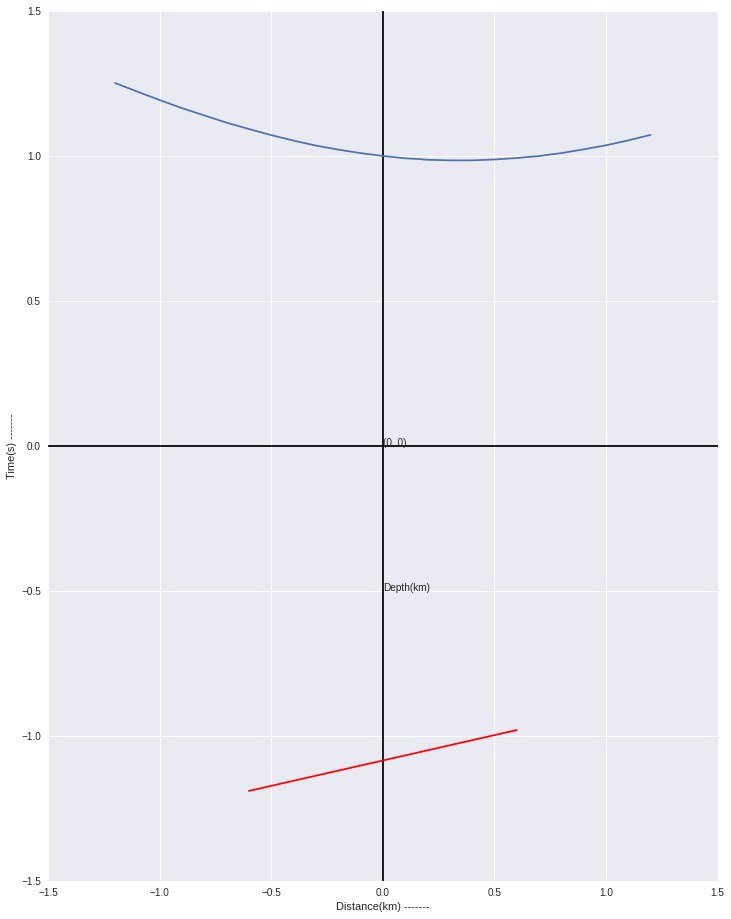

In [ ]:
# plotting distance and time

import matplotlib.pyplot as plt
plt.style.use("seaborn")

d_neg = np.array([-0.6, 0.6])
d_pos = np.array([-1.19, -0.98])

offset_neg = df["x_neg(km)"].to_numpy()
offset_pos = df["x_pos(km)"].to_numpy()

time_neg = df["time_neg(s)"].to_numpy()
time_pos = df["time_pos(s)"].to_numpy()

offset_arr = np.concatenate([offset_neg, offset_pos])
time_arr = np.concatenate([time_neg, time_pos])

plt.figure(figsize = (12, 16))
plt.plot(offset_arr, time_arr)
plt.plot(d_neg, d_pos, color = "r")
plt.annotate("(0, 0)", (0, 0))
plt.annotate("Depth(km)", (0, -0.5))
plt.xlabel("Distance(km) -------")
plt.ylabel("Time(s) -------")
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.hlines(0, -1.5, 1.5)
plt.vlines(0, -1.5, 1.5)
plt.grid(True)
plt.show()

# Exercise 11

1. Estimate the dominant frequency content of
the attached seis mic section below A at 0 76 s,
0 94 s, and 2 18 s Assume that the reflections
at these times are relatively free of
interference and are representative The
seismic section has been processed to
produce a minimum phase waveform and is
displayed with re verse polarity (SEG).

2. Assume that laterally extensive sandstones occur at
the times used above for the calculation of the
seismic section’s varying dominant frequency Calcu
late the minimum thickness of such a laterally exten
sive sandstone having reflection coefficients of
opposite sign at its top and base for:

3. no interference between reflections from the unit’s
top and base (half wavelength)

4. the tuning thickness (quarter wavelength)

5. the approximate thickness below which a recog
nizable reflection is not expected (about one
thirtieth wavelength)

6. Assume internal velocities for the sandstone of 2200
m/s at 0.76; 2800 m/s at 0.94; 4000 m/s at 2.18 s



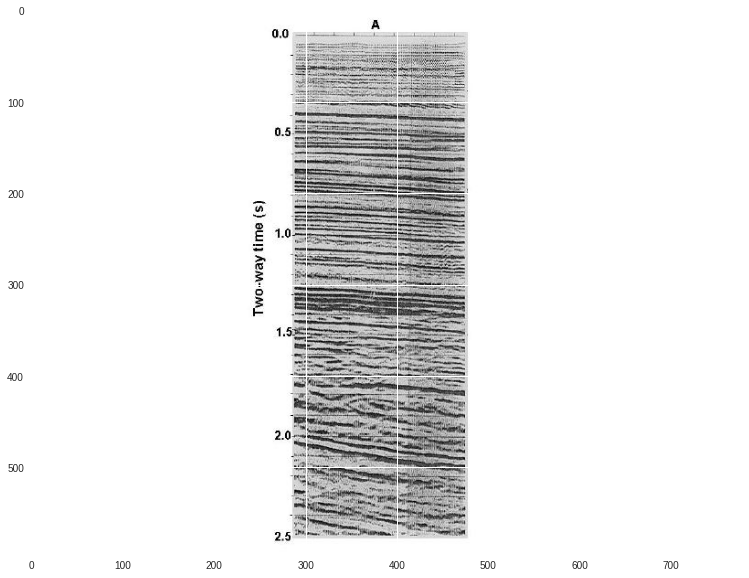

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt
img = Image.open("/content/drive/MyDrive/Python/seismic_profile.JPG")
plt.figure(figsize = (20, 10))
plt.imshow(img)

In [ ]:
#determination of dominant frequency
# duration (peak to peak or trough to trough) is T
# T values for different times 0.76 s, 0.94 s and 2.18 s are found from the above seismic section

T1 = 0.019
T2 = 0.021
T3 = 0.07

# Now f1, f2 and f3

f1 = 1/T1
f2 = 1/T2
f3 = 1/T3

# Velocities given inthe question are 2200 m/s, 2800 m/s and 4000 m/s
V1 = 2200
V2 = 2800
V3 = 4000
# We know, v = f*lambda , where, lambda = wavelength 

lambda1 = round(V1/f1, 2)
lambda2 = round(V2/f2, 2)
lambda3 = round(V3/f3, 2)

In [ ]:
# creating the ultimate dataframe
import pandas as pd
df = pd.DataFrame({"Time(s)" : [0.76, 0.94, 2.18],
                   "λ" : [lambda1, lambda2, lambda3],
                   "λ/2" : [lambda1/2, lambda2/2, lambda3/2], 
                   "λ/4" : [lambda1/4, lambda2/4, lambda3/4],
                   "λ/30" : [lambda1/30, lambda1/30, lambda3/30]})
df

,Time(s),λ,λ/2,λ/4,λ/30
0,0.76,41.8,20.9,10.45,1.393333
1,0.94,58.8,29.4,14.70,1.393333
2,2.18,280.0,140.0,70.00,9.333333


# Exercise - 14

The travel times of waves at first arrival are given in the table below.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

x = np.arange(0, 3 + 0.2, 0.2)
time = np.array([0, 0.25, .50, .75, 1.0, 1.25, 1.47, 1.56, 1.65, 1.75, 1.84, 1.93, 2.01, 2.07, 2.13, 2.18])

df = pd.DataFrame({"X(km)" : x, "Time(s)" : time})
df

,X(km),Time(s)
0,0.0,0.00
1,0.2,0.25
2,0.4,0.50
3,0.6,0.75
4,0.8,1.00
5,1.0,1.25
6,1.2,1.47
7,1.4,1.56
8,1.6,1.65
9,1.8,1.75


1. Determine the number of layers from the
time distance curve and find out the wave
velocity in each layer and thickness of the
layers, if the layering is horizontal and there is
no low speed layer or blind zone in the
section


2. From the velocities found above, what rock
types you would expect to encounter in a drill
hole?

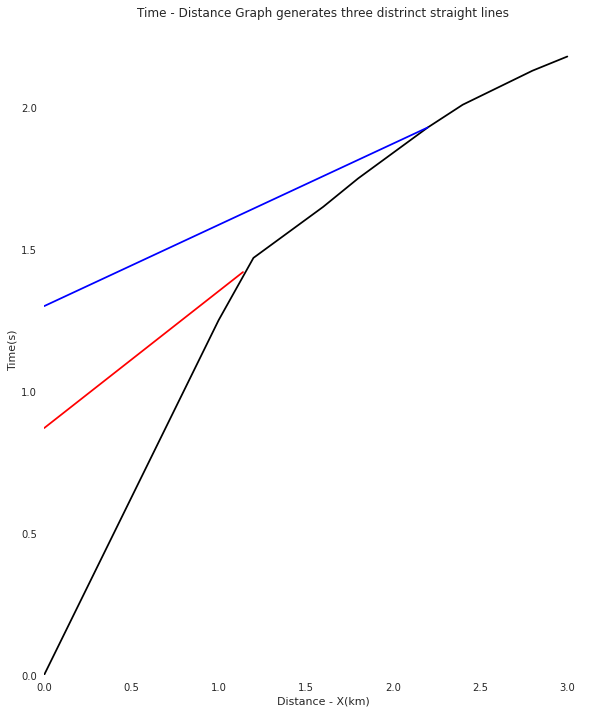

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (10, 12))
plt.plot(df["X(km)"] , df["Time(s)"],color = "k")
#extrapolate_1
ext_x = [0, 1.14]
ext_y = [0.87, 1.42]
plt.plot(ext_x, ext_y, color = "red")
#extrapolate_1
ext_x1 = [0, 2.2]
ext_y1 = [1.3, 1.93]
plt.plot(ext_x1, ext_y1, color = "b")
plt.xlabel("Distance - X(km)")
plt.ylabel("Time(s)")
plt.title("Time - Distance Graph generates three distrinct straight lines")
plt.xlim(0, 3.2)
plt.ylim(0, 2.3)
plt.grid()
plt.show()

In [ ]:
# slope determination manual graph paper
# slope 1/v1 = (t2-t1)/(x2-x1)

def velocity_not(t1, t2, x1, x2):
  v_not = (x2 - x1) / (t2 - t1)
  return v_not

def velocity_one(t1, t2, x1, x2):
  v_one = (x2 - x1) / (t2 - t1)
  return v_one

def velocity_two(t1, t2, x1, x2):
  v_two = (x2 - x1) / (t2 - t1)
  return v_two


# for first straight line
t2_not = 0.75
t1_not = 0.4
x2_not = 0.6
x1_not = 0.32
v_not = round(velocity_not(t1_not, t2_not, x1_not, x2_not), 3)

# for second straight line
t2_one = 1.84
t1_one = 1.6
x2_one = 2.0
x1_one = 1.5
v_one = round(velocity_one(t1_one, t2_one, x1_one, x2_one), 3)

# for third straight line
t2_two = 2.13
t1_two = 2.0
x2_two = 2.8
x1_two = 2.4
v_two = round(velocity_two(t1_two, t2_two, x1_two, x2_two), 3)
  
# velocity

print("v_not = " + str(v_not) + " km/s")
print("v_one = " + str(v_one) + " km/s")
print("v_two = " + str(v_two) + " km/s")

v_not = 0.8 km/s
v_one = 2.083 km/s
v_two = 3.077 km/s


In [ ]:
#From graph paper 
# The thickness of the first layer can be obtained by the time_one = 0.87 s
# The thickness of the second layer can be obtained by the time_two = 1.3 s

ti_one = 0.87
ti_two = 1.3

def depth_not(v_not, v_one, ti_one):
  h_not = (ti_one * v_one * v_not) / (2 * np.sqrt(v_one**2 - v_not**2))
  return h_not

def depth_one(v_not, v_one, v_two, ti_two):
  h_one = ((v_two * v_one) / (2 * np.sqrt(v_two**2 - v_one**2))) * (ti_two -(2 * depth_not(v_not, v_one, ti_one) * np.sqrt(v_two**2 - v_not**2) ) / (v_two * v_not))
  return h_one

h_not = round(depth_not(v_not, v_one, ti_one), 3)
h_one = round(depth_one(v_not, v_one, v_two, ti_two), 3)

print("The thickness of the first layer = " +  str(h_not) + " km")
print("The thickness of the second layer = " +  str(h_one) + " km")


The thickness of the first layer = 0.377 km
The thickness of the second layer = 0.552 km
